# Block 45: Demonstration (Solution)
## Image Classification Using the Fashion-MNIST Dataset

- The Fashion-MNIST_Model refers to a model that has been specifically trained and developed to perform classification tasks on the Fashion-MNIST dataset.

- It consists of 70,000 grayscale images of fashion items belonging to 10 different categories, such as T-shirts, dresses, shoes, etc.

 ## Steps to follow:  

 1: Import Necessary Libraries  
 2: Define Data Transformations  
 3: Load MNIST Dataset  
 4: Create Data Loaders  
 5: Define a Function to Display Images  
 6: Display Random Training Images  
 7: Define a Custom Neural Network Model  
 8: Define Loss Function and Optimization Algorithm  
 9: Training Loop  
 10: Evaluate the Model  

### Import Necessary Libraries  
- Import essential libraries for working with PyTorch, including neural network components and tools for handling image data.


In [ ]:
# Import necessary PyTorch and torchvision libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Define Data Transformations  
- Data transformations are defined using torchvision.transforms.Compose. These transformations include converting images to tensors and normalizing pixel values to have a mean and standard deviation of 0.5.

In [ ]:
# Define data transformations using torchvision's Compose
# Transforms images to tensors and normalizes pixel values
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

### Load MNIST Dataset
- The Fashion-MNIST dataset is loaded for both training and testing. It specifies the root directory where the dataset will be stored ('./data'), whether it's for training or testing, the defined transformations, and whether to download the dataset if it's not already available.

In [ ]:
# Load the Fashion-MNIST training and test datasets
# The datasets will be downloaded to the './data' directory if not already available
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 313kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.7MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



### Create Data Loaders  
- Data loaders (trainloader and testloader) are created using torch.utils.data.DataLoader. These loaders allow for efficient batch loading and shuffling of data during training and testing.

In [ ]:
# Create data loaders for training and testing
# Data loaders provide batches of data during training and testing
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Print the number of samples in the training and test datasets
print("Training data shape:", len(trainset))
print("Test data shape:", len(testset))

Training data shape: 60000
Test data shape: 10000


###  Define a Function to Display Images  and Display Random Training Images
- The script imports the numpy library and defines a function 'imshow' for displaying images. It unnormalizes, converts PyTorch tensor to NumPy array, and prints labels for the first four images.

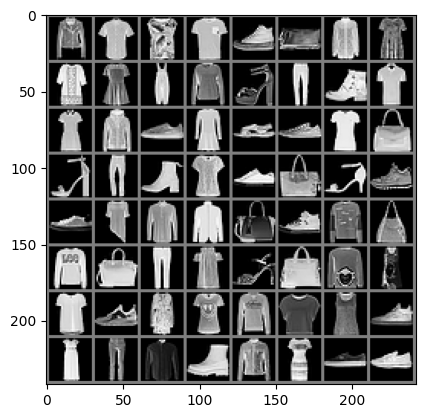

    4     6     6     0


In [ ]:
# Import the numpy library with an alias 'np'
import numpy as np  # Add this import at the beginning of your script

# Define a function 'imshow' for displaying images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()  # Convert the PyTorch tensor to a NumPy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose the array to match image format
    plt.show()

# Get a batch of random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show the images using the 'imshow' function
imshow(torchvision.utils.make_grid(images))

# Print the labels for the first four images in the batch
print(' '.join(f'{labels[j]:5d}' for j in range(4)))  # Corrected format code for labels


**Observations:**
- The code starts by importing the NumPy library with the alias 'np' at the beginning of the script.

- A function named 'imshow' is defined to display images. It takes an image tensor as input.

- Inside the 'imshow' function:

- The input image tensor is unnormalized by dividing it by 2 and adding 0.5. This is a common step when working with normalized image data.
- The unnormalized image tensor is converted to a NumPy array using img.numpy().
- The array is transposed to change the order of dimensions from (C, H, W) to (H, W, C) to match the standard image format.
- The transposed array is displayed as an image using plt.imshow, and plt.show() is used to show the image.
- A batch of random training images and their corresponding labels is obtained using the iter (trainloader) and next (dataiter) functions.

- The 'imshow' function is called to display the batch of images as a grid.

- Labels for the first four images in the batch are printed to the console with proper formatting.


### Define a Custom Neural Network Model
- Create a 'FashionNet' neural network class with a fully connected layer, a ReLU activation function, and 10 output units. Flatten input, apply ReLU activation, and create an instance.

In [ ]:
# Define a neural network class named 'FashionNet' that inherits from 'nn.Module'
class FashionNet(nn.Module):
    def __init__(self):
        super(FashionNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Fully connected layer with 28x28 input and 128 output units
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(128, 10)  # Fully connected layer with 128 input and 10 output units (10 classes for Fashion-MNIST)
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input (batch of images)
        x = self.fc1(x)  # Pass through the first fully connected layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  # Pass through the second fully connected layer
        x = self.softmax(x)
        return x

# Create an instance of the 'FashionNet' model
model = FashionNet()

### Define Loss Function and Optimization Algorithm  
The loss function is defined as Cross-Entropy Loss, while the optimizer is Stochastic Gradient Descent (SGD) with a learning rate of 0.01 and momentum of 0.9.

In [ ]:
# Define the loss function as Cross-Entropy Loss, loss function is commonly used for classification tasks in PyTorch
criterion = nn.CrossEntropyLoss()



# Define the optimizer as Stochastic Gradient Descent (SGD) with learning rate 0.01 and momentum 0.9
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

### Training Loop  
- The training loop involves 10 epochs, with gradients zeroed to prevent accumulation. Predictions computed, loss calculated, backpropagation computed, model weights updated, and loss accumulated.

In [ ]:
# Training loop with 10 epochs
num_epochs = 10
for epoch in range(num_epochs):

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the gradients to prevent accumulation

        outputs = model(inputs)  # Forward pass: compute predictions
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backpropagation: compute gradients
        optimizer.step()  # Update model weights using the optimizer

        running_loss += loss.item()  # Accumulate the loss for this batch

    # Print the average loss for this epoch
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

# Print a message indicating the completion of training
print("Finished Training")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 1, Loss: 1.762296733698611
Epoch 2, Loss: 1.6714578403084517
Epoch 3, Loss: 1.659297426753461
Epoch 4, Loss: 1.6525710728376912
Epoch 5, Loss: 1.6479435250449028
Epoch 6, Loss: 1.644962323626984
Epoch 7, Loss: 1.642360956938282
Epoch 8, Loss: 1.6400275396894035
Epoch 9, Loss: 1.6377896501311362
Epoch 10, Loss: 1.6358323679295683
Finished Training


**Observations:**
- The FashionNet class defines a neural network architecture with two linear layers, a ReLU activation function, and a forward pass. An instance of the model is created, and the Cross-Entropy Loss function is used for training. The Stochastic Gradient Descent optimizer is used, and a training loop is initiated for 10 epochs. Gradients are zeroed, and model predictions are computed. The loss is calculated, and the average loss is printed to monitor training progress.

### Evaluate the Model
- Use 'torch.no_grad()' to disable gradient computation during evaluation. Separate data into images and labels, forward pass for model predictions, find predicted class indices, increase total count, check for true labels, calculate accuracy, and print on the test set.

In [ ]:
# Initialize variables to keep track of correct predictions and total test samples
correct = 0
total = 0

# Use the 'torch.no_grad()' context manager to disable gradient computation during evaluation
with torch.no_grad():
    # Iterate through the test data loader
    for data in testloader:
        # Separate the data into images and labels
        images, labels = data

        # Forward pass to get model predictions
        outputs = model(images)

        # Get the predicted class indices by finding the maximum values along dimension 1 (across classes)
        _, predicted = torch.max(outputs.data, 1)

        # Increase the 'total' count by the number of labels in the current batch
        total += labels.size(0)

        # Check which predictions match the true labels and accumulate correct predictions
        correct += (predicted == labels).sum().item()

# Calculate the accuracy as the ratio of correct predictions to total samples and multiply by 100
accuracy = (correct / total) * 100

# Print the accuracy on the test set with formatting
print(f"Accuracy on the test set: {accuracy:.2f}%")


Accuracy on the test set: 10.91%


**Observations:**
- The text describes a method for calculating the accuracy of a machine learning model. It uses two variables, correct and total, to track the number of correct predictions and total test samples. The torch.no_grad() context manager temporarily disables gradient computation during evaluation. The model iterates through the testloader, separating images and labels, and performs forward passes to obtain prediction scores. The total count is increased by the number of labels in the current batch. The accuracy is calculated as a percentage.
